In [1]:
import pandas as pd
import matplotlib
import string

GOT= pd.read_csv('https://raw.githubusercontent.com/trong-shen/Game-of-Throne-Project/master/Game_of_Thrones_Script.csv')

#Extract only season one data
GOT1=GOT[GOT.Season=="Season 1"]

print(GOT1.head())
print(GOT1.info())

  Release Date    Season    Episode     Episode Title          Name  \
0   2011-04-17  Season 1  Episode 1  Winter is Coming  waymar royce   
1   2011-04-17  Season 1  Episode 1  Winter is Coming          will   
2   2011-04-17  Season 1  Episode 1  Winter is Coming  waymar royce   
3   2011-04-17  Season 1  Episode 1  Winter is Coming          will   
4   2011-04-17  Season 1  Episode 1  Winter is Coming         gared   

                                            Sentence  
0  What do you expect? They're savages. One lot s...  
1  I've never seen wildlings do a thing like this...  
2                             How close did you get?  
3                            Close as any man would.  
4                   We should head back to the wall.  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3179 entries, 0 to 3178
Data columns (total 6 columns):
Release Date     3179 non-null object
Season           3179 non-null object
Episode          3179 non-null object
Episode Title    3179 n

In [2]:
!pip install nltk
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /Users/kyle/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/kyle/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /Users/kyle/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /Users/kyle/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     /Users/kyle/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     /Users/kyle/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to
[nltk_data]   

True

In [3]:
#list of contractions and the expanded mapping 
CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [4]:
#define a function, expand_contractions, which takes a string and expands all contractions within the string using contraction_map
def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    expanded = ''
    text = text.lower() #make all text lowercase
    wordList = text.split() #put text into a list of words
    for i in range(len(wordList)):
        if wordList[i] in contraction_mapping.keys(): #for each word, if it is a contraction in the listing
            expanded = expanded + ' ' + contraction_mapping[wordList[i]] #then replace with the expanded version
        else:
            expanded = expanded + ' ' + wordList[i] #otherwise, keep the original word
    return expanded

#define a function, remove_punctuation, which takes in a string and removes all punctuation 
def remove_punctuation(s):
    s = s.translate(str.maketrans('','',string.punctuation)) #take out punctuation in the sentence
    j = nltk.word_tokenize(s.lower()) #put each word in the sentence within a list, j
    return s

#define function, clean_sentences, which removes punctuation and expands all contractions in a sentence
def clean_sentences(text):
    return remove_punctuation(expand_contractions(text))
    

In [5]:
GOT1['Sentences_Clean'] = GOT1.Sentence.apply(lambda x:clean_sentences(x))
GOT1.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Release Date,Season,Episode,Episode Title,Name,Sentence,Sentences_Clean
0,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,What do you expect? They're savages. One lot s...,what do you expect they are savages one lot s...
1,2011-04-17,Season 1,Episode 1,Winter is Coming,will,I've never seen wildlings do a thing like this...,i have never seen wildlings do a thing like t...
2,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,How close did you get?,how close did you get
3,2011-04-17,Season 1,Episode 1,Winter is Coming,will,Close as any man would.,close as any man would
4,2011-04-17,Season 1,Episode 1,Winter is Coming,gared,We should head back to the wall.,we should head back to the wall


In [22]:
#define stopwords
stopword=nltk.corpus.stopwords.words('english')
stopword = stopword + ['l', 'k', 'would'] #add stopwords that we noticed were misspelled in the data

#Define a function, remove_stopwords, which takes in a string and removes stop words
def remove_stopwords(sentence, stopwords = stopword):
    nostop = ''
    sentence = sentence.split()
    for i in range(len(sentence)):
        if sentence[i] not in stopwords: #for each word, if it is not a stopword
            nostop = nostop + ' ' + sentence[i] #then include it in the revised sentenced
    nostop = nostop.split()
    return nostop

In [23]:
#Implement the stop words function to a new column 
GOT1['Tokenized_No_Stop']=GOT1.Sentences_Clean.apply(lambda x:remove_stopwords(x))
GOT1.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Release Date,Season,Episode,Episode Title,Name,Sentence,Sentences_Clean,Tokenized_No_Stop,Num_Words
0,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,What do you expect? They're savages. One lot s...,what do you expect they are savages one lot s...,"[expect, savages, one, lot, steals, goat, anot...",27
1,2011-04-17,Season 1,Episode 1,Winter is Coming,will,I've never seen wildlings do a thing like this...,i have never seen wildlings do a thing like t...,"[never, seen, wildlings, thing, like, never, s...",23
2,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,How close did you get?,how close did you get,"[close, get]",5
3,2011-04-17,Season 1,Episode 1,Winter is Coming,will,Close as any man would.,close as any man would,"[close, man]",5
4,2011-04-17,Season 1,Episode 1,Winter is Coming,gared,We should head back to the wall.,we should head back to the wall,"[head, back, wall]",7


In [24]:
#Calculate words per line, assuming contractions are all expanded
GOT1["Num_Words"] = GOT1.Sentences_Clean.apply(lambda x: len(x.split()))
GOT1.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Release Date,Season,Episode,Episode Title,Name,Sentence,Sentences_Clean,Tokenized_No_Stop,Num_Words
0,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,What do you expect? They're savages. One lot s...,what do you expect they are savages one lot s...,"[expect, savages, one, lot, steals, goat, anot...",27
1,2011-04-17,Season 1,Episode 1,Winter is Coming,will,I've never seen wildlings do a thing like this...,i have never seen wildlings do a thing like t...,"[never, seen, wildlings, thing, like, never, s...",23
2,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,How close did you get?,how close did you get,"[close, get]",5
3,2011-04-17,Season 1,Episode 1,Winter is Coming,will,Close as any man would.,close as any man would,"[close, man]",5
4,2011-04-17,Season 1,Episode 1,Winter is Coming,gared,We should head back to the wall.,we should head back to the wall,"[head, back, wall]",7


In [25]:
#to find the characters with most words
import numpy as np
GOTData = pd.pivot_table(GOT1, values='Num_Words', index='Name', aggfunc=np.sum) #pivot number of words by character name

GOT_Top5 = GOTData.sort_values('Num_Words') #find characters with the most words said
GOT_Top5 = GOT_Top5.tail()

GOT_Top5 = pd.DataFrame(GOT_Top5.to_records()) #convert into a dataframe
GOT_Top5

,Name,Num_Words
0,catelyn stark,1531
1,petyr baelish,1753
2,robert baratheon,2492
3,eddard stark,3285
4,tyrion lannister,3588


In [26]:
#to find each characters favourite word (i.e. most repeated word, not including stopwords)

#define a function, character_words, that appends all tokenized_no_stop words for a chosen character in the form of a list
def character_words(character):
    l = []
    for i in range(len(GOT1['Name'])):
        if character in GOT1['Name'][i]:
            l = l + GOT1['Tokenized_No_Stop'][i]
    return l

#define a function, most_freq, that takes a character and outputs the most common word said
def most_freq(s):
    wordlist = character_words(s) #get the list of words said for the character
    word_dict = {} #create dictionary to track count of unique words
    for i in wordlist:
        if i in word_dict.keys():
            word_dict[i] = word_dict[i] + 1
        else:
            word_dict[i] = 1
    freq = sorted(word_dict.items(), key=lambda x: x[1], reverse=True) #sort by value
    return freq[0][0]

In [27]:
GOT_Top5['Fave_Word'] = GOT_Top5.Name.apply(lambda x: most_freq(x)) #obtain favourite word for top 5 characters

In [28]:
GOT_Top5

,Name,Num_Words,Fave_Word
0,catelyn stark,1531,lord
1,petyr baelish,1753,lord
2,robert baratheon,2492,king
3,eddard stark,3285,king
4,tyrion lannister,3588,father


,Release Date,Season,Episode,Episode Title,Name,Sentence,Sentences_Clean,Tokenized_No_Stop,Num_Words


In [29]:
Tyrion = ' '.join(character_words('tyrion'))
Eddard = ' '.join(character_words('eddard'))
Robert = ' '.join(character_words('robert'))
Petyr = ' '.join(character_words('petyr'))
Catelyn = ' '.join(character_words('catelyn'))

In [15]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [30]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

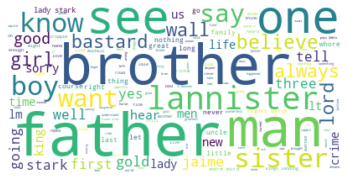

In [31]:
#Generate word cloud for Arya using the top 150 words

wordcloud = WordCloud(max_font_size=70, max_words=150, background_color="white").generate(Tyrion)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

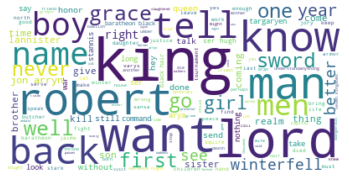

In [32]:
wordcloud = WordCloud(max_font_size=70, max_words=150, background_color="white").generate(Eddard)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

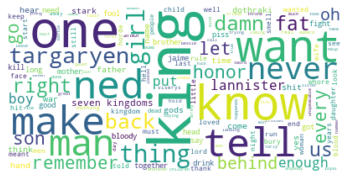

In [33]:
wordcloud = WordCloud(max_font_size=70, max_words=150, background_color="white").generate(Robert)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

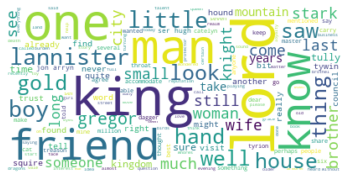

In [34]:
wordcloud = WordCloud(max_font_size=70, max_words=150, background_color="white").generate(Petyr)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

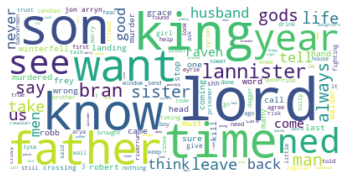

In [35]:
wordcloud = WordCloud(max_font_size=70, max_words=150, background_color="white").generate(Catelyn)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()